In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Métricas de Avaliação de Modelos de Classificação

- **VP** = verdadeiro positivo
- **VN** = verdadeiro negativo
- **FP** = falso positivo
- **FN** = falso negativo




## Fórmulas

### Acurácia
Acurácia é a performance geral do modelo:
VP + VN/ VP + VN+ FP + FN

### Precisão
Precisão verifica quantas classificações positivas foram corretas:
VP/VP+FP 

### Revocação
Revocação mede quantos dos positivos esperados estão corretos:
VP/VP+FN

### F1-Score
F1-Score é a média harmônica entre precisão e revocação:
2 * Precisão * Revocação/Precisão+revocação



In [2]:
#definindo dataset
a = pd.read_csv('C:/csv/Regressao/wine_dataset.csv')

In [3]:
a.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [25]:
#dividindo dataset
#Y = só vai ter o style
#x vai ter todas as colunas menos style
y = a['style']
X = a.drop('style', axis=1)

In [26]:
#dividindo entre treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [27]:
#definindo modelo
modelo = ExtraTreesClassifier()

In [28]:
#fitanto treinos
modelo.fit(X_treino, y_treino)
predictions = modelo.predict(X_teste)

#aplicando matriz de confusão no teste
cm = confusion_matrix(y_teste, predictions)

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['red', 'white'])

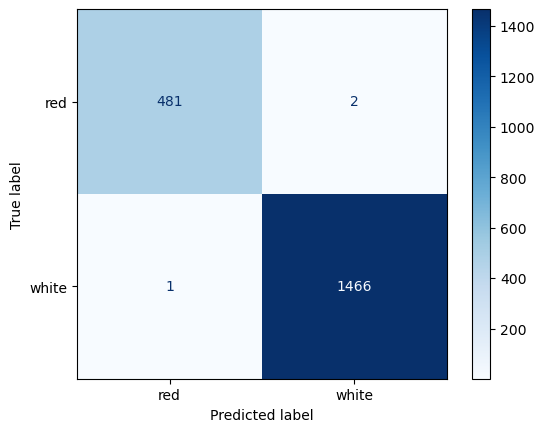

In [30]:
#Vendo distribuição de Verdadeiros positivos e negativos e falsos positivos e negativos
disp.plot(cmap=plt.cm.Blues)

#481 vermelhos certos e 2 errados
#1466 brancos certos e 1 errado

In [31]:
#checando precisão, recall e f1-score
print(classification_report(y_teste, predictions))

              precision    recall  f1-score   support

         red       1.00      1.00      1.00       483
       white       1.00      1.00      1.00      1467

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



In [32]:
print(confusion_matrix(y_teste, predictions))

[[ 481    2]
 [   1 1466]]


In [4]:
#lidando com anomalias
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.optimize as opt

In [13]:
import scipy.io as spio

# Gerando dataframe para analise

def generate_dataset_with_anomalies(num_train_samples=1000, num_val_samples=200, num_features=2, num_anomalies=50):
    # Gerando dados normais para treinamento
    X = np.random.normal(loc=0, scale=1, size=(num_train_samples, num_features))
    
    # Gerando dados normais para validação
    X_val_normal = np.random.normal(loc=0, scale=1, size=(num_val_samples - num_anomalies, num_features))
    
    # Gerando anomalias para validação
    X_val_anomalies = np.random.uniform(low=-10, high=10, size=(num_anomalies, num_features))
    
    # Combinando dados normais e anomalias para validação
    X_val = np.vstack((X_val_normal, X_val_anomalies))
    
    # Criando labels para os dados de validação
    y_val = np.hstack((np.zeros(num_val_samples - num_anomalies), np.ones(num_anomalies)))
    
    # Embaralhando os dados de validação e as labels de forma sincronizada
    indices = np.arange(X_val.shape[0])
    np.random.shuffle(indices)
    X_val = X_val[indices]
    y_val = y_val[indices]
    
    return X, X_val, y_val

def save_to_mat(X, X_val, y_val, filename='dadosanomalias.mat'):
    scipy.io.savemat(filename, {'X': X, 'Xval': X_val, 'yval': y_val})
    print(f'Dataset salvo como {filename}')

# Gerando o dataset
X, X_val, y_val = generate_dataset_with_anomalies()

# Salvar no arquivo .mat
save_to_mat(X, X_val, y_val)



Dataset salvo como dadosanomalias.mat


In [14]:
def load_mat_to_dataframe(filename):
    # Carregar o arquivo .mat
    mat = scipy.io.loadmat(filename)
    
    # Extrair dados e labels
    X = np.array(mat['X'])
    X_val = np.array(mat['Xval'])
    y_val = mat['yval'].flatten()
    
    # Criar DataFrames do pandas
    df_X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
    df_X_val = pd.DataFrame(X_val, columns=[f'feature_{i}' for i in range(X_val.shape[1])])
    df_y_val = pd.DataFrame(y_val, columns=['label'])
    
    return df_X, df_X_val, df_y_val

# Nome do arquivo .mat
filename = 'dadosanomalias.mat'

# Carregar o arquivo .mat e converter para DataFrames
df_X, df_X_val, df_y_val = load_mat_to_dataframe(filename)

# Exibir as primeiras linhas dos DataFrames
print("Dados de Treinamento:")
print(df_X.head())
print("\nDados de Validação:")
print(df_X_val.head())
print("\nLabels de Validação:")
print(df_y_val.head())


Dados de Treinamento:
   feature_0  feature_1
0   0.671752   0.862263
1  -0.853042   0.539765
2   0.271994   0.442638
3   0.281453  -1.225669
4  -0.581439   0.157735

Dados de Validação:
   feature_0  feature_1
0   0.835145  -0.184791
1  -5.602107  -3.210149
2   0.125551   0.440348
3  -0.528912  -9.680541
4  -0.091207  -0.558275

Labels de Validação:
   label
0    0.0
1    1.0
2    0.0
3    1.0
4    0.0


In [15]:
data = spio.loadmat(filename)

In [16]:
X = np.array(data['X'])

X_val = np.array(data['Xval'])
y_val = data['yval'].flatten()
     

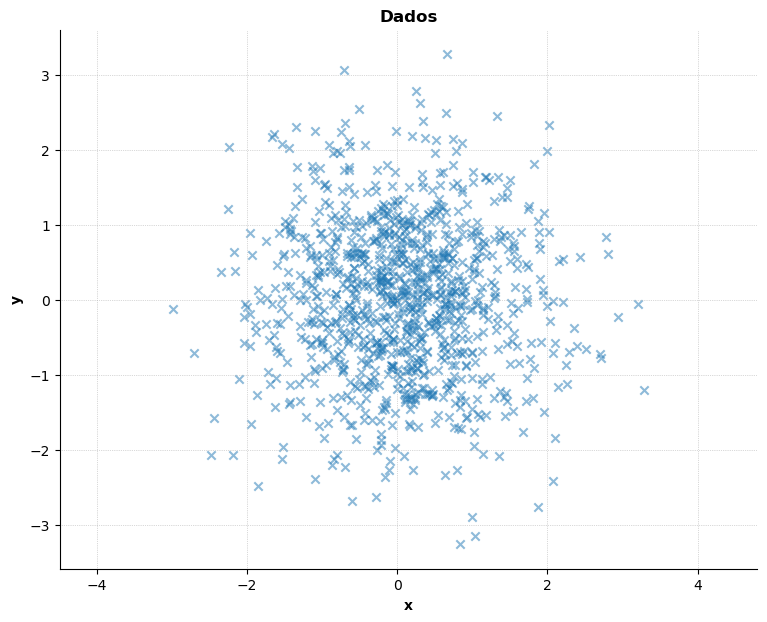

In [17]:
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Dispersão dos dados
plt.scatter(X[:,0], X[:,1], marker='x', alpha=0.5)


#Configurações visuais adicionais
plt.title('Dados',
          fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.xlabel('x', fontweight='bold')
plt.axis('equal')
sns.despine()


# checando dados discrepantes visualmente

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from sklearn.model_selection import cross_val_score # Cross Validation Function.
from sklearn.model_selection import KFold # KFold Class.
from sklearn.linear_model import LinearRegression # Linear Regression class.

In [20]:
#validação cruzada
df = pd.read_csv("C:/csv/Regressao/Admission_Predict.csv")

In [21]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df.drop('Serial No.', axis = 1, inplace = True)

In [23]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [24]:
x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [27]:
#checando os datasets
print("x")
print(x.head())
print("\ny")
print(y.head())

x
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0

y
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


In [41]:
#aplicando modelo de regressão linear
model  = LinearRegression()

#embaralhando a data(validação cruzada), n_splits = quantidade de bases
kfold  = KFold(n_splits=5, shuffle=True)
result = cross_val_score(model, x, y, cv = kfold)

In [42]:
#vendo a acuracia de cada base
#a cross validation deu 0,79(media geral)
print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))
     

K-Fold (R^2) Scores: [0.78852328 0.81350023 0.7743004  0.75461034 0.83013549]
Mean R^2 for Cross-Validation K-Fold: 0.7922139482083258
